# $H_2O$ + $CO_2$ band 03a

In [18]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

from climatools.plot.plot import *

from IPython import display

In [3]:
rundir = os.path.join('/chia_cluster/home/jackyu/radiation/crd/LW/examples/separate_g_groups/study__lblnew_g1_threshold/h2o/band03a_wn_540_620/nv_200/dv_0.005/ng_7/g_ascending_k_descending/refPTs_P_600_T_250/ng_refs_7/getabsth_auto/absth_dlogN_uniform/wgt_0.7_0.7_0.7_0.5_0.5_0.5_0.5/wgt_flux_2/wgt_k_1/klin_none/w_diffuse_1.9_1.7_1.4_1.4_1.4_1.55_1.6/crd_commitnumber/atmpro_mls/h2o_co2')

In [56]:



coolr = pd.read_csv(os.path.join(rundir, 'output_coolr.dat'),
                    sep=r'\s+')

coolr.set_index(['pressure'], inplace=True)

coolr = xr.Dataset.from_dataframe(coolr)

In [49]:
wlux = pd.read_csv(os.path.join(rundir, 'output_wflux.dat'),
                   sep=r'\s+')
wlux.set_index(['pressure', 'igg'], inplace=True)

woolr = pd.read_csv(os.path.join(rundir, 'output_wcoolr.dat'),
                    sep=r'\s+')

woolr.head()
woolr.set_index(['pressure', 'igg'], inplace=True)

woolr = xr.Dataset.from_dataframe(woolr)

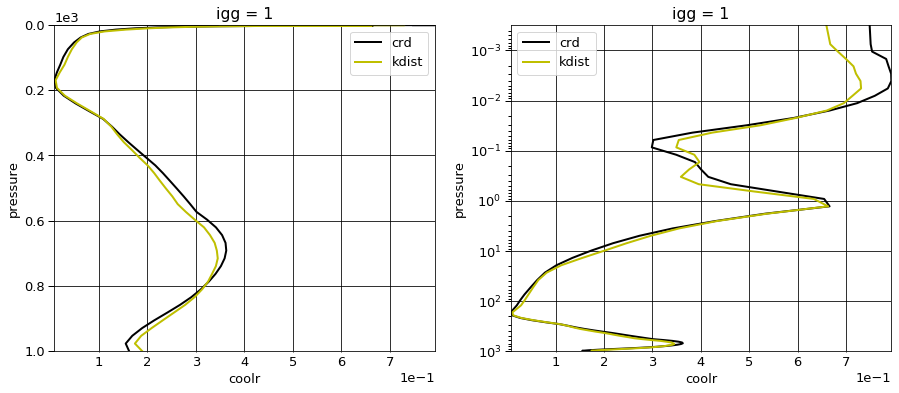

In [30]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

axs = axs.flatten()
yscales = ['linear', 'log']

for ax, yscale in zip(axs, yscales):
    coolr['coolr'].climaviz.plot(ax=ax,
                                 yscale=yscale,
                                 label='crd',
                                 color='k',
                                 index_on_yaxis=True,
                                 yincrease=False,
                                 linewidth=2,
                                 grid=True)
    woolr['coolr'].sel(igg=1)\
    .climaviz.plot(ax=ax,
                   yscale=yscale,
                   label='kdist',
                   color='y',
                   index_on_yaxis=True,
                   yincrease=False,
                   linewidth=2,
                  grid=True)

In [77]:


flux = pd.read_csv(os.path.join(rundir, 'output_flux.dat'),
                   sep=r'\s+')
flux.set_index(['pressure'], inplace=True)
flux = flux.sort_index()
flux = flux.drop('level', axis=1)


wlux = pd.read_csv(os.path.join(rundir, 'output_wflux.dat'),
                   sep=r'\s+')
wlux.set_index(['pressure', 'igg'], inplace=True)
wlux = wlux.sort_index()

wlux = wlux.loc[(slice(None), 1), :]

wlux.index = wlux.index.droplevel('igg')
wlux = wlux.drop('level', axis=1)

pd.set_option('display.max_rows', None)
display.display(
    pd.concat([flux, wlux, wlux - flux],
              keys=['crd', 'kdist (igg=1)', 'kdist - crd'],
              axis=1)
)
pd.reset_option('display.max_rows')

crd                       kdist (igg=1)             \
                   sfu        sfd       fnet           sfu        sfd   
pressure                                                                
0.000000    -25.264724   0.000000 -25.264724    -25.474541   0.000000   
0.000624    -25.264748   0.000080 -25.264668    -25.474565   0.000073   
0.000876    -25.264757   0.000112 -25.264646    -25.474575   0.000102   
0.001229    -25.264771   0.000157 -25.264614    -25.474588   0.000144   
0.001723    -25.264789   0.000221 -25.264569    -25.474606   0.000204   
0.002417    -25.264815   0.000311 -25.264504    -25.474631   0.000288   
0.003391    -25.264850   0.000437 -25.264412    -25.474666   0.000405   
0.004757    -25.264898   0.000614 -25.264284    -25.474716   0.000573   
0.006672    -25.264963   0.000858 -25.264106    -25.474782   0.000805   
0.009359    -25.265055   0.001191 -25.263864    -25.474874   0.001124   
0.013128    -25.265182   0.001641 -25.263541    -25.475003   0.001563   
0.018415    -25.265362   0.002237 -25.263124    -25.475184   0.002157   
0.025830    -25.265619   0.003015 -25.262604    -25.475446   0.002944   
0.036232    -25.265995   0.004001 -25.261994    -25.475826   0.003969   
0.050823    -25.266561   0.005228 -25.261333    -25.476400   0.005274   
0.071291    -25.267406   0.006805 -25.260601    -25.477240   0.006974   
0.100000    -25.268624   0.009039 -25.259585    -25.478434   0.009356   
0.140271    -25.270258   0.012338 -25.257920    -25.480010   0.012776   
0.196760    -25.272313   0.016989 -25.255324    -25.481975   0.017399   
0.275997    -25.274788   0.023222 -25.251565    -25.484320   0.023270   
0.387100    -25.277577   0.031477 -25.246100    -25.486914   0.030585   
0.543100    -25.280238   0.042674 -25.237565    -25.489305   0.040287   
0.761700    -25.281497   0.058384 -25.223113    -25.490003   0.054235   
1.068500    -25.278906   0.079584 -25.199321    -25.486778   0.074029   
1.498800    -25.270562   0.105179 -25.165383    -25.477816   0.098857   
2.102400    -25.258546   0.131260 -25.127286    -25.465890   0.125309   
2.949000    -25.244589   0.160404 -25.084186    -25.451929   0.154804   
4.136600    -25.229351   0.193245 -25.036106    -25.436320   0.189139   
5.802500    -25.213133   0.230930 -24.982202    -25.419070   0.230397   
8.139200    -25.196147   0.274558 -24.921589    -25.400161   0.279857   
11.417000   -25.178610   0.324607 -24.854003    -25.379527   0.337522   
16.014700   -25.161592   0.380952 -24.780641    -25.358431   0.401046   
22.464000   -25.147712   0.444746 -24.702966    -25.339936   0.467856   
31.510500   -25.140070   0.520676 -24.619394    -25.327188   0.542489   
44.200100   -25.141608   0.615484 -24.526124    -25.323127   0.635217   
62.000000   -25.158345   0.734271 -24.424074    -25.335441   0.760628   
85.775000   -25.202238   0.878465 -24.323773    -25.378243   0.926987   
109.550000  -25.267887   1.018196 -24.249691    -25.445243   1.094253   
133.325000  -25.352790   1.159069 -24.193721    -25.533879   1.263489   
157.100000  -25.459045   1.301632 -24.157413    -25.649367   1.431834   
180.875000  -25.592416   1.456502 -24.135914    -25.795415   1.606912   
204.650000  -25.754166   1.649183 -24.104983    -25.969337   1.817708   
228.425000  -25.940134   1.911292 -24.028842    -26.166105   2.097135   
252.200000  -26.144364   2.260619 -23.883745    -26.378820   2.463690   
275.975000  -26.367861   2.708496 -23.659364    -26.609746   2.926279   
299.750000  -26.614892   3.260918 -23.353974    -26.862332   3.487149   
323.525000  -26.878779   3.881655 -22.997124    -27.129835   4.107759   
347.300000  -27.155876   4.560976 -22.594900    -27.409013   4.774305   
371.075000  -27.445420   5.302212 -22.143208    -27.698178   5.489146   
394.850000  -27.746543   6.106952 -21.639591    -27.997847   6.260919   
418.625000  -28.058260   6.975068 -21.083192    -28.306408   7.086239   
442.400000  -28.379918   7.905854 -20.474064    -28.622853   7.966951   
466.

In [80]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
